In [1]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn

import pandas as pd
import numpy as np
import models.nestd
import os
import json
from theanomodels.utils.misc import loadHDF5
from models.nestd import NestD

Populating the interactive namespace from numpy and matplotlib


/usr/local/pkg/python/2.7/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, cuDNN not available)


## Settings

In [2]:
OUTPUT_DIR = 'output/001_GumbelSoftmaxM2/cw128_seed1'

## Load samples

In [3]:
samples = NestD(loadHDF5(os.path.join(OUTPUT_DIR,'samples.h5')))

In [4]:
samples_reshaped = samples.prune().apply(lambda x: x.reshape(-1,28,28))

In [5]:
samples_reshaped.apply(np.shape)

NestD{
 U: NestD{
   p: (31000, 28, 28)}
 L: NestD{
   p: (31000, 28, 28)}}

## Plot function

In [6]:
def todisplayimage(x,cols=25,sep=3,split=100):
    n,m1,m2 = x.shape
    Y = []
    for s in range(0,n,split):
        rows = int(np.ceil(split/float(cols)))
        y = np.zeros((rows*(m1+sep),cols*(m2+sep)))
        c=0
        for j in range(s,min(n,s+split)):
            i = j % split
            c = i % cols
            r = int(np.floor(i/cols))
            #print s,i,n,r*(m1+sep),r*(m1+sep)+m1,c*(m2+sep),c*(m2+sep)+m2
            y[r*(m1+sep):r*(m1+sep)+m1,c*(m2+sep):c*(m2+sep)+m2] = x[j]
        Y.append(y)
    YY = [Y[0]]
    for y in Y[1:]:
        YY.append(np.zeros((sep*4,cols*(m2+sep))))
        YY.append(y)    
    return np.concatenate(YY,axis=0)

## Plot samples

(-0.5, 774.5, 1347.5, -0.5)

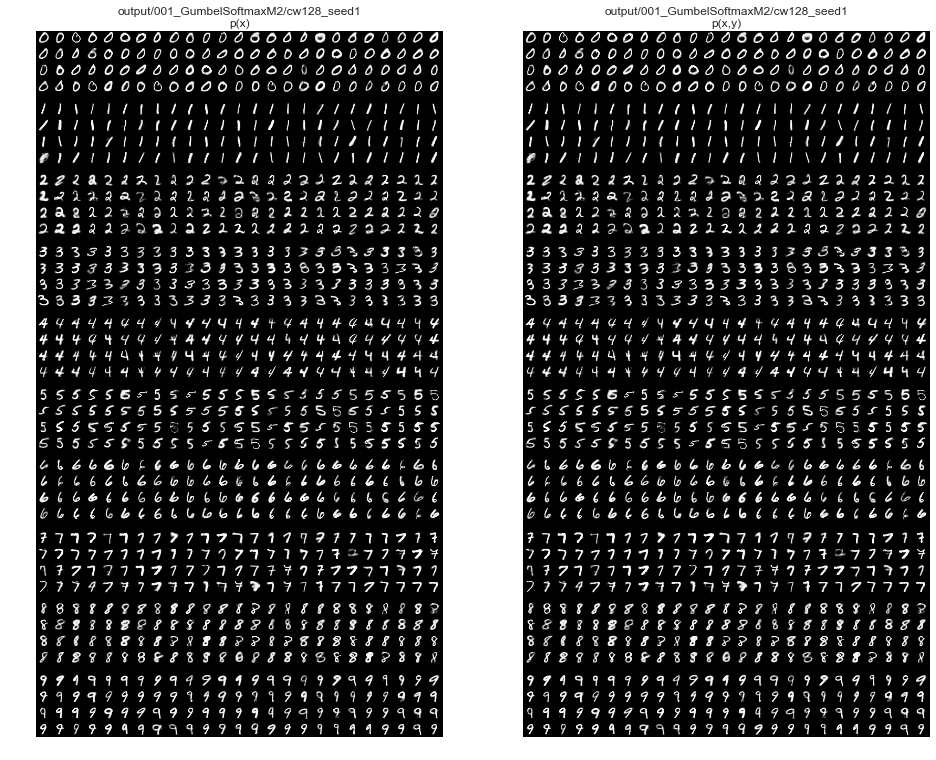

In [7]:
plt.figure(1,figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(1-todisplayimage(samples_reshaped['U']['p'][-1000:]))
plt.gca().grid(False)
plt.title('%s\np(x)' % (OUTPUT_DIR))
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(1-todisplayimage(samples_reshaped['L']['p'][-1000:]))
plt.gca().grid(False)
plt.title('%s\np(x,y)' % (OUTPUT_DIR))
plt.axis('off')